<a href="https://colab.research.google.com/github/SRezaA102/MachineLearningTask/blob/main/Minggu2/2_Logistic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama :Syahrul Reza Ananda

NIM : 1103210113

DataSet :Superstore

# **Memuat Library**

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# **Memuat Data & Menampilkan Data**

In [84]:
url = "/content/drive/MyDrive/Machine Learning/Minggu 2/Superstore.csv"
superstore_data  = pd.read_csv(url)
superstore_data.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,CA-2016-152156,2016-11-08T00:00:00Z,2016-11-11T00:00:00Z,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08T00:00:00Z,2016-11-11T00:00:00Z,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12T00:00:00Z,2016-06-16T00:00:00Z,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11T00:00:00Z,2015-10-18T00:00:00Z,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11T00:00:00Z,2015-10-18T00:00:00Z,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# **Memilih Fitur dan Label**

In [85]:
# Pilih fitur (misalnya, 'Sales', 'Profit', 'Quantity')
X = superstore_data[['sales', 'profit', 'quantity']]

In [86]:
# Pilih label
y = superstore_data['category']

# **Pisahkan Data untuk Pelatihan dan Pengujian**

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Normalisasi Fitur**

In [88]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Inisialisasi dan Latih Model Logistic Regression**

In [89]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

# **Prediksi dan Evaluasi Model**

In [90]:
y_pred = model.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Evaluasi presisi
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# Evaluasi recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

# Evaluasi F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-score: {f1}')

# Tampilkan confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Tampilkan classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.6423211605802901
Precision: 0.6033770768147841
Recall: 0.6423211605802901
F1-score: 0.5554086892336895
Confusion Matrix:
[[  76  328    9]
 [  21 1185   20]
 [  29  308   23]]

Classification Report:
                 precision    recall  f1-score   support

      Furniture       0.60      0.18      0.28       413
Office Supplies       0.65      0.97      0.78      1226
     Technology       0.44      0.06      0.11       360

       accuracy                           0.64      1999
      macro avg       0.57      0.40      0.39      1999
   weighted avg       0.60      0.64      0.56      1999



# **Visualisasi Data**

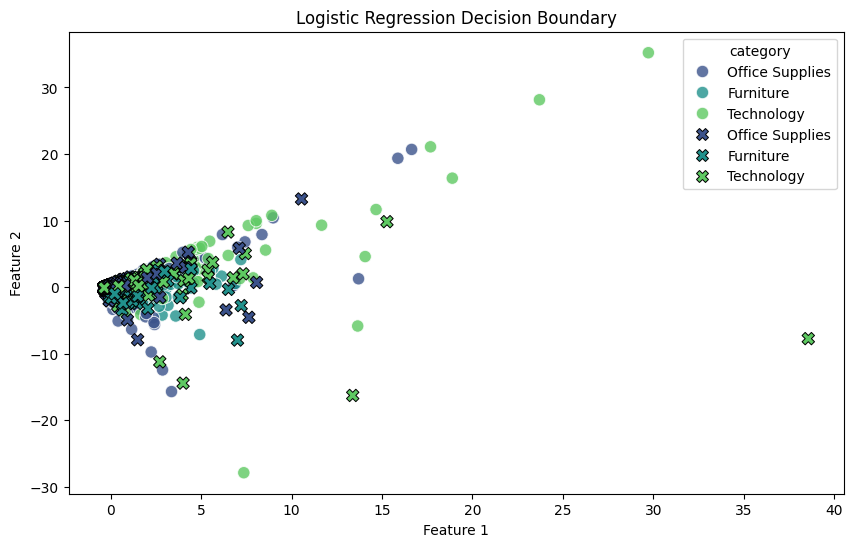

In [91]:
# Visualisasi data pelatihan
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette='viridis', s=80, alpha=0.8, edgecolors='w')

# Visualisasi data pengujian
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette='viridis', s=80, marker='X', edgecolors='k')

# Visualisasi garis keputusan (decision boundary)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Menambahkan label dan judul
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Menampilkan plot
plt.show()

In [92]:
dataset.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'product_id', 'category', 'subcategory', 'product_name',
       'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

<ipython-input-93-9d3fd451b567>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True)


<Axes: >

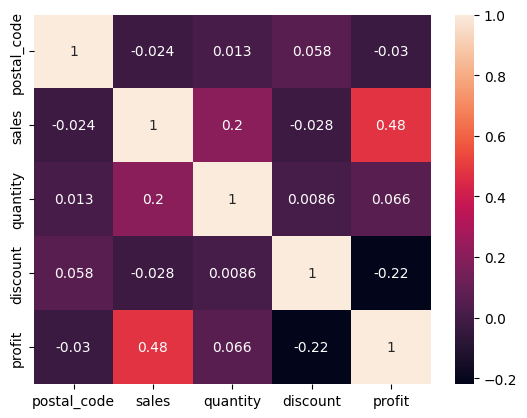

In [93]:
sns.heatmap(dataset.corr(),annot=True)